In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#### Data Loading :

In [2]:
data = pd.read_csv('WineQT.csv')
data = np.array(data)
print("DATA.SHAPE:",data.shape)

DATA.SHAPE: (1143, 13)


#### Data Preprossesing :

In [3]:
np.random.shuffle(data)
Sz = (data.shape)[0]
data_train = data[:(Sz//5)*4].T
x_train = data[0:11]
y_train = data[11]

data_test = data[(Sz//5)*4:].T
x_test = data[0:11]
y_test = data[11]
print("DATA_TRAIN.SHAPE:",data_train.shape)
print("DATA_TEST.SHAPE:",data_test.shape)

def normalization(input):
    mean = np.mean(input,axis=0)
    std_deviation = np.std(input,axis=0)
    normalized = ((input - mean)/std_deviation).T
    return mean , std_deviation , normalized

mean , std_dev , norm_x_train = normalization(x_train.T)
norm_x_test = ((x_test.T - mean)/std_dev).T

DATA_TRAIN.SHAPE: (13, 912)
DATA_TEST.SHAPE: (13, 231)


In [4]:
def init():
    W1 = np.random.rand(6, 11)
    b1 = np.random.rand(6, 1) 
    W2 = np.random.rand(6, 6) 
    b2 = np.random.rand(6, 1) 
    return W1, b1, W2, b2

def ReLU(x):
    return np.maximum(0,x)

def ReLU_deriv(x):
    return x>0   

def softmax(x):
    e_x = np.exp(x - np.max(x))
    out = e_x / np.sum(e_x, axis=0)
    return out

def softmax_derivative(x):
    n = x.shape[0]
    j = -x.reshape(-1, 1) @ x.reshape(1, -1)
    np.fill_diagonal(j, x * (1 - x))
    return j
    
def sigmoid(x):
    return 1 / (1 + np.exp(-1 * x))

def sigmoid_deriv(x) :
    return sigmoid(x) * (1 - sigmoid(x)) 

def forward_pp(w1, b1, w2, b2, x):
    z1 = np.dot(w1, x) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = sigmoid(z2)
    return z1,a1,z2,a2

def backward_pp(Z1, A1, A2, W2, X, Y):
    m = X.shape[1]
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * sigmoid_deriv(Z1)
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1,db1,dW2,db2

def one_hot_encoding(x):
    one_hot = np.zeros((x.size,x.max() + 1))
    one_hot[np.arange(x.size),x] = 1
    one_hot = one_hot.T
    return one_hot

def update(W1, b1, W2, b2, dW1, db1, dW2, db2, a):
    W1 = W1 - a * dW1
    b1 = b1 - a * db1    
    W2 = W2 - a * dW2  
    b2 = b2 - a * db2    
    return W1, b1, W2, b2

def get_predictions(x):
    return np.argmax(x, 0)

def get_accuracy(predictions, x):
    return np.sum(predictions == x) / x.size


def MSE(Y_pred, Y_true):
    return np.mean((Y_pred - Y_true) ** 2)

def gradient_descent(parameters, gradients, learning_rate):
    
    L = len(parameters) // 2

    for l in range(1, L + 1):
        parameters["W" + str(l)] -= learning_rate * gradients["dW" + str(l)]
        parameters["b" + str(l)] -= learning_rate * gradients["db" + str(l)]

    return parameters



Iteration 0, Loss: 36325.60169081432
Iteration 100, Loss: 36325.47691110245
Iteration 200, Loss: 36325.355982040666
Iteration 300, Loss: 36325.23880032532
Iteration 400, Loss: 36325.125264331
Iteration 500, Loss: 36325.01527415321
Iteration 600, Loss: 36324.908731646115
Iteration 700, Loss: 36324.80554045529
Iteration 800, Loss: 36324.70560604556
Iteration 900, Loss: 36324.60883572438
Iteration 1000, Loss: 36324.51513866069
Iteration 1100, Loss: 36324.4244258995
Iteration 1200, Loss: 36324.33661037246
Iteration 1300, Loss: 36324.25160690458
Iteration 1400, Loss: 36324.16933221721
Iteration 1500, Loss: 36324.089704927705
Iteration 1600, Loss: 36324.01264554574
Iteration 1700, Loss: 36323.93807646667
Iteration 1800, Loss: 36323.86592196192
Iteration 1900, Loss: 36323.796108166964
Iteration 2000, Loss: 36323.728563066536
Iteration 2100, Loss: 36323.66321647802
Iteration 2200, Loss: 36323.600000032275
Iteration 2300, Loss: 36323.538847153024
Iteration 2400, Loss: 36323.479693034205
Iterati

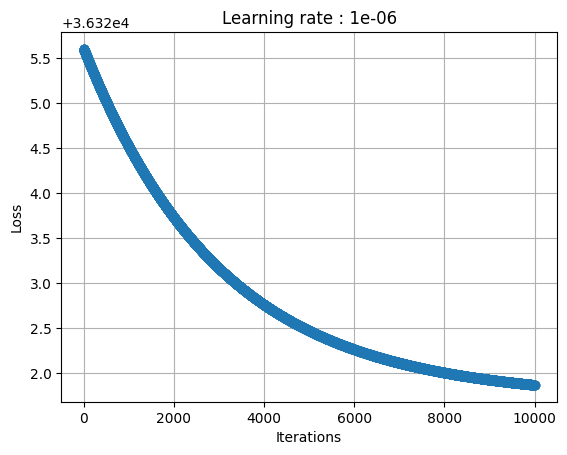

Iteration 0, Loss: 36326.74174884969
Iteration 100, Loss: 36325.34685334521
Iteration 200, Loss: 36324.345272603874
Iteration 300, Loss: 36323.628632275126
Iteration 400, Loss: 36323.11590836958
Iteration 500, Loss: 36322.7480612609
Iteration 600, Loss: 36322.48279384935
Iteration 700, Loss: 36322.2901295411
Iteration 800, Loss: 36322.148958944956
Iteration 900, Loss: 36322.04446336509
Iteration 1000, Loss: 36321.966246479424
Iteration 1100, Loss: 36321.90700405905
Iteration 1200, Loss: 36321.86158785991
Iteration 1300, Loss: 36321.8263517905
Iteration 1400, Loss: 36321.79869729592
Iteration 1500, Loss: 36321.7767580178
Iteration 1600, Loss: 36321.7591812395
Iteration 1700, Loss: 36321.74497633978
Iteration 1800, Loss: 36321.73340954423
Iteration 1900, Loss: 36321.7239306389
Iteration 2000, Loss: 36321.71612175292
Iteration 2100, Loss: 36321.709661395085
Iteration 2200, Loss: 36321.70429905288
Iteration 2300, Loss: 36321.69983712456
Iteration 2400, Loss: 36321.69611796036
Iteration 250

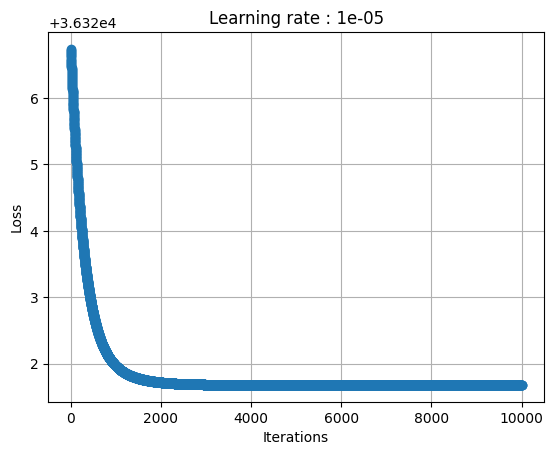

Iteration 0, Loss: 36325.3885558598
Iteration 100, Loss: 36321.919710168426
Iteration 200, Loss: 36321.71253416403
Iteration 300, Loss: 36321.68325433817
Iteration 400, Loss: 36321.67852409791
Iteration 500, Loss: 36321.67788580737
Iteration 600, Loss: 36321.67782237688
Iteration 700, Loss: 36321.67781826171
Iteration 800, Loss: 36321.677818112905
Iteration 900, Loss: 36321.67781811076
Iteration 1000, Loss: 36321.67781811077
Iteration 1100, Loss: 36321.677818110766
Iteration 1200, Loss: 36321.677818110766
Iteration 1300, Loss: 36321.677818110766
Iteration 1400, Loss: 36321.677818110766
Iteration 1500, Loss: 36321.677818110766
Iteration 1600, Loss: 36321.677818110766
Iteration 1700, Loss: 36321.677818110766
Iteration 1800, Loss: 36321.677818110766
Iteration 1900, Loss: 36321.677818110766
Iteration 2000, Loss: 36321.677818110766
Iteration 2100, Loss: 36321.677818110766
Iteration 2200, Loss: 36321.677818110766
Iteration 2300, Loss: 36321.677818110766
Iteration 2400, Loss: 36321.6778181107

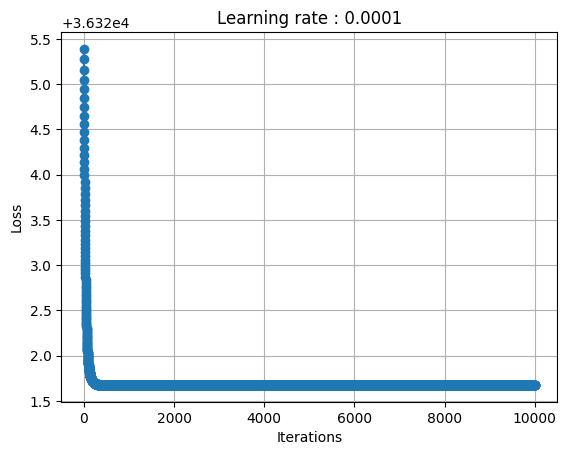

Iteration 0, Loss: 36324.31001487554
Iteration 100, Loss: 36321.67781811074
Iteration 200, Loss: 36321.677818110766
Iteration 300, Loss: 36321.677818110766
Iteration 400, Loss: 36321.677818110766
Iteration 500, Loss: 36321.677818110766
Iteration 600, Loss: 36321.677818110766
Iteration 700, Loss: 36321.677818110766
Iteration 800, Loss: 36321.677818110766
Iteration 900, Loss: 36321.677818110766
Iteration 1000, Loss: 36321.677818110766
Iteration 1100, Loss: 36321.677818110766
Iteration 1200, Loss: 36321.677818110766
Iteration 1300, Loss: 36321.677818110766
Iteration 1400, Loss: 36321.677818110766
Iteration 1500, Loss: 36321.677818110766
Iteration 1600, Loss: 36321.677818110766
Iteration 1700, Loss: 36321.677818110766
Iteration 1800, Loss: 36321.677818110766
Iteration 1900, Loss: 36321.677818110766
Iteration 2000, Loss: 36321.677818110766
Iteration 2100, Loss: 36321.677818110766
Iteration 2200, Loss: 36321.677818110766
Iteration 2300, Loss: 36321.677818110766
Iteration 2400, Loss: 36321.67

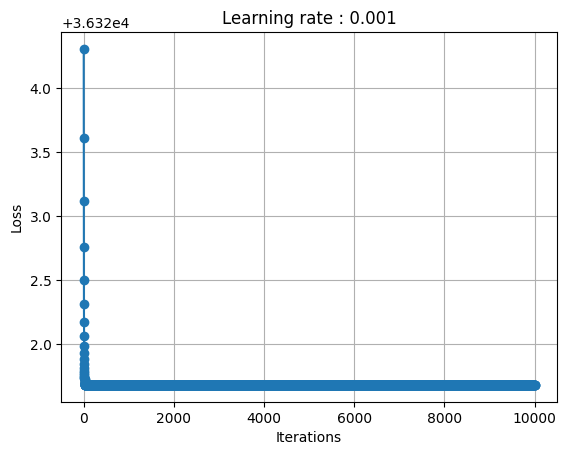

Iteration 0, Loss: 36325.88474959242
Iteration 100, Loss: 36321.677818110766
Iteration 200, Loss: 36321.677818110766
Iteration 300, Loss: 36321.677818110766
Iteration 400, Loss: 36321.677818110766
Iteration 500, Loss: 36321.677818110766
Iteration 600, Loss: 36321.677818110766
Iteration 700, Loss: 36321.677818110766
Iteration 800, Loss: 36321.677818110766
Iteration 900, Loss: 36321.677818110766
Iteration 1000, Loss: 36321.677818110766
Iteration 1100, Loss: 36321.677818110766
Iteration 1200, Loss: 36321.677818110766
Iteration 1300, Loss: 36321.677818110766
Iteration 1400, Loss: 36321.677818110766
Iteration 1500, Loss: 36321.677818110766
Iteration 1600, Loss: 36321.677818110766
Iteration 1700, Loss: 36321.677818110766
Iteration 1800, Loss: 36321.677818110766
Iteration 1900, Loss: 36321.677818110766
Iteration 2000, Loss: 36321.677818110766
Iteration 2100, Loss: 36321.677818110766
Iteration 2200, Loss: 36321.677818110766
Iteration 2300, Loss: 36321.677818110766
Iteration 2400, Loss: 36321.6

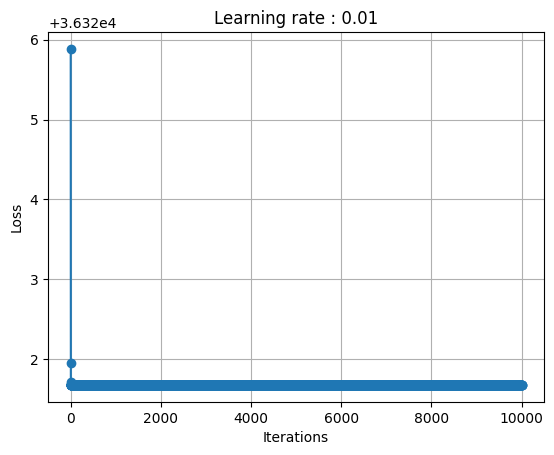

Iteration 0, Loss: 36328.91446467415
Iteration 100, Loss: 36321.677818110766
Iteration 200, Loss: 36321.677818110766
Iteration 300, Loss: 36321.677818110766
Iteration 400, Loss: 36321.677818110766
Iteration 500, Loss: 36321.677818110766
Iteration 600, Loss: 36321.677818110766
Iteration 700, Loss: 36321.677818110766
Iteration 800, Loss: 36321.677818110766
Iteration 900, Loss: 36321.677818110766
Iteration 1000, Loss: 36321.677818110766
Iteration 1100, Loss: 36321.677818110766
Iteration 1200, Loss: 36321.677818110766
Iteration 1300, Loss: 36321.677818110766
Iteration 1400, Loss: 36321.677818110766


C:\Users\USER\AppData\Local\Temp\ipykernel_5888\3292437298.py:26: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-1 * x))


Iteration 1500, Loss: 36321.677818110766
Iteration 1600, Loss: 36321.677818110766
Iteration 1700, Loss: 36321.677818110766
Iteration 1800, Loss: 36321.677818110766
Iteration 1900, Loss: 36321.677818110766
Iteration 2000, Loss: 36321.677818110766
Iteration 2100, Loss: 36321.677818110766
Iteration 2200, Loss: 36321.677818110766
Iteration 2300, Loss: 36321.677818110766
Iteration 2400, Loss: 36321.677818110766
Iteration 2500, Loss: 36321.677818110766
Iteration 2600, Loss: 36321.677818110766
Iteration 2700, Loss: 36321.677818110766
Iteration 2800, Loss: 36321.677818110766
Iteration 2900, Loss: 36321.677818110766
Iteration 3000, Loss: 36321.677818110766
Iteration 3100, Loss: 36321.677818110766
Iteration 3200, Loss: 36321.677818110766
Iteration 3300, Loss: 36321.677818110766
Iteration 3400, Loss: 36321.677818110766
Iteration 3500, Loss: 36321.677818110766
Iteration 3600, Loss: 36321.677818110766
Iteration 3700, Loss: 36321.677818110766
Iteration 3800, Loss: 36321.677818110766
Iteration 3900, 

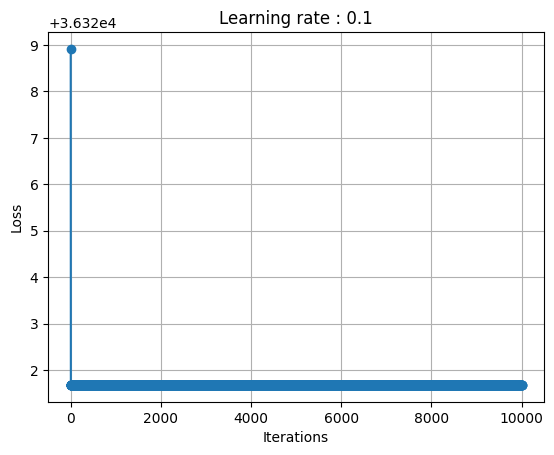

Iteration 0, Loss: 36327.76644497666
Iteration 100, Loss: 36321.677818110766
Iteration 200, Loss: 36321.677818110766
Iteration 300, Loss: 36321.677818110766
Iteration 400, Loss: 36321.677818110766
Iteration 500, Loss: 36321.677818110766
Iteration 600, Loss: 36321.677818110766
Iteration 700, Loss: 36321.677818110766
Iteration 800, Loss: 36321.677818110766
Iteration 900, Loss: 36321.677818110766
Iteration 1000, Loss: 36321.677818110766
Iteration 1100, Loss: 36321.677818110766
Iteration 1200, Loss: 36321.677818110766
Iteration 1300, Loss: 36321.677818110766
Iteration 1400, Loss: 36321.677818110766
Iteration 1500, Loss: 36321.677818110766
Iteration 1600, Loss: 36321.677818110766
Iteration 1700, Loss: 36321.677818110766
Iteration 1800, Loss: 36321.677818110766
Iteration 1900, Loss: 36321.677818110766
Iteration 2000, Loss: 36321.677818110766
Iteration 2100, Loss: 36321.677818110766
Iteration 2200, Loss: 36321.677818110766
Iteration 2300, Loss: 36321.677818110766
Iteration 2400, Loss: 36321.6

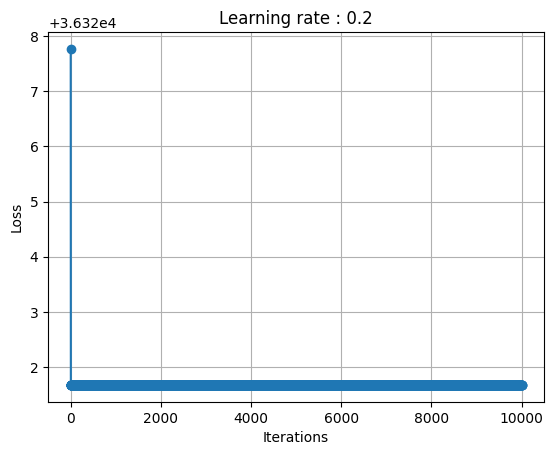

Iteration 0, Loss: 36324.62534331392
Iteration 100, Loss: 36321.677818110766
Iteration 200, Loss: 36321.677818110766
Iteration 300, Loss: 36321.677818110766
Iteration 400, Loss: 36321.677818110766
Iteration 500, Loss: 36321.677818110766
Iteration 600, Loss: 36321.677818110766
Iteration 700, Loss: 36321.677818110766
Iteration 800, Loss: 36321.677818110766
Iteration 900, Loss: 36321.677818110766
Iteration 1000, Loss: 36321.677818110766
Iteration 1100, Loss: 36321.677818110766
Iteration 1200, Loss: 36321.677818110766
Iteration 1300, Loss: 36321.677818110766
Iteration 1400, Loss: 36321.677818110766
Iteration 1500, Loss: 36321.677818110766
Iteration 1600, Loss: 36321.677818110766
Iteration 1700, Loss: 36321.677818110766
Iteration 1800, Loss: 36321.677818110766
Iteration 1900, Loss: 36321.677818110766
Iteration 2000, Loss: 36321.677818110766
Iteration 2100, Loss: 36321.677818110766
Iteration 2200, Loss: 36321.677818110766
Iteration 2300, Loss: 36321.677818110766
Iteration 2400, Loss: 36321.6

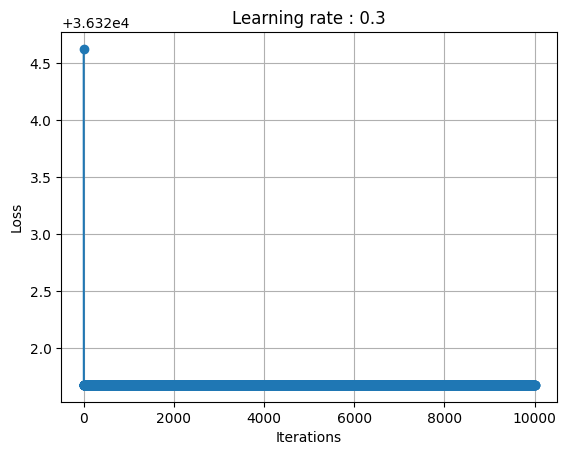

Iteration 0, Loss: 36326.36833778321
Iteration 100, Loss: 36321.677818110766
Iteration 200, Loss: 36321.677818110766
Iteration 300, Loss: 36321.677818110766
Iteration 400, Loss: 36321.677818110766
Iteration 500, Loss: 36321.677818110766
Iteration 600, Loss: 36321.677818110766
Iteration 700, Loss: 36321.677818110766
Iteration 800, Loss: 36321.677818110766
Iteration 900, Loss: 36321.677818110766
Iteration 1000, Loss: 36321.677818110766
Iteration 1100, Loss: 36321.677818110766
Iteration 1200, Loss: 36321.677818110766
Iteration 1300, Loss: 36321.677818110766
Iteration 1400, Loss: 36321.677818110766
Iteration 1500, Loss: 36321.677818110766
Iteration 1600, Loss: 36321.677818110766
Iteration 1700, Loss: 36321.677818110766
Iteration 1800, Loss: 36321.677818110766
Iteration 1900, Loss: 36321.677818110766
Iteration 2000, Loss: 36321.677818110766
Iteration 2100, Loss: 36321.677818110766
Iteration 2200, Loss: 36321.677818110766
Iteration 2300, Loss: 36321.677818110766
Iteration 2400, Loss: 36321.6

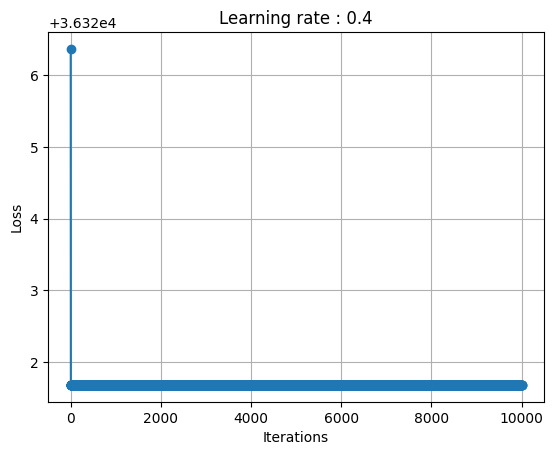

Iteration 0, Loss: 36326.009785798415
Iteration 100, Loss: 36321.677818110766
Iteration 200, Loss: 36321.677818110766
Iteration 300, Loss: 36321.677818110766
Iteration 400, Loss: 36321.677818110766
Iteration 500, Loss: 36321.677818110766
Iteration 600, Loss: 36321.677818110766
Iteration 700, Loss: 36321.677818110766
Iteration 800, Loss: 36321.677818110766
Iteration 900, Loss: 36321.677818110766
Iteration 1000, Loss: 36321.677818110766
Iteration 1100, Loss: 36321.677818110766
Iteration 1200, Loss: 36321.677818110766
Iteration 1300, Loss: 36321.677818110766
Iteration 1400, Loss: 36321.677818110766
Iteration 1500, Loss: 36321.677818110766
Iteration 1600, Loss: 36321.677818110766
Iteration 1700, Loss: 36321.677818110766
Iteration 1800, Loss: 36321.677818110766
Iteration 1900, Loss: 36321.677818110766
Iteration 2000, Loss: 36321.677818110766
Iteration 2100, Loss: 36321.677818110766
Iteration 2200, Loss: 36321.677818110766
Iteration 2300, Loss: 36321.677818110766
Iteration 2400, Loss: 36321.

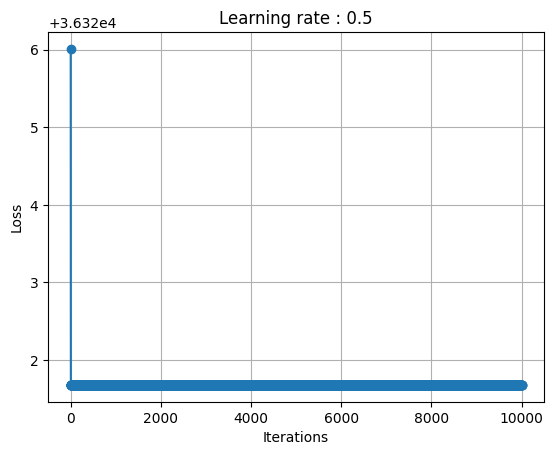

Iteration 0, Loss: 36328.351518505704
Iteration 100, Loss: 36321.677818110766
Iteration 200, Loss: 36321.677818110766
Iteration 300, Loss: 36321.677818110766
Iteration 400, Loss: 36321.677818110766
Iteration 500, Loss: 36321.677818110766
Iteration 600, Loss: 36321.677818110766
Iteration 700, Loss: 36321.677818110766
Iteration 800, Loss: 36321.677818110766
Iteration 900, Loss: 36321.677818110766
Iteration 1000, Loss: 36321.677818110766
Iteration 1100, Loss: 36321.677818110766
Iteration 1200, Loss: 36321.677818110766
Iteration 1300, Loss: 36321.677818110766
Iteration 1400, Loss: 36321.677818110766
Iteration 1500, Loss: 36321.677818110766
Iteration 1600, Loss: 36321.677818110766
Iteration 1700, Loss: 36321.677818110766
Iteration 1800, Loss: 36321.677818110766
Iteration 1900, Loss: 36321.677818110766
Iteration 2000, Loss: 36321.677818110766
Iteration 2100, Loss: 36321.677818110766
Iteration 2200, Loss: 36321.677818110766
Iteration 2300, Loss: 36321.677818110766
Iteration 2400, Loss: 36321.

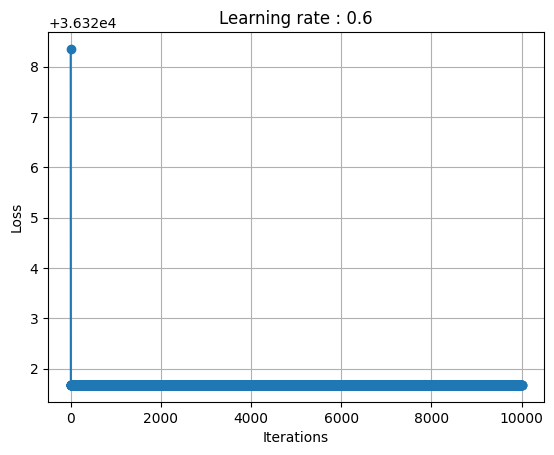

Iteration 0, Loss: 36328.19227120131
Iteration 100, Loss: 36321.677818110766
Iteration 200, Loss: 36321.677818110766
Iteration 300, Loss: 36321.677818110766
Iteration 400, Loss: 36321.677818110766
Iteration 500, Loss: 36321.677818110766
Iteration 600, Loss: 36321.677818110766
Iteration 700, Loss: 36321.677818110766
Iteration 800, Loss: 36321.677818110766
Iteration 900, Loss: 36321.677818110766
Iteration 1000, Loss: 36321.677818110766
Iteration 1100, Loss: 36321.677818110766
Iteration 1200, Loss: 36321.677818110766
Iteration 1300, Loss: 36321.677818110766
Iteration 1400, Loss: 36321.677818110766
Iteration 1500, Loss: 36321.677818110766
Iteration 1600, Loss: 36321.677818110766
Iteration 1700, Loss: 36321.677818110766
Iteration 1800, Loss: 36321.677818110766
Iteration 1900, Loss: 36321.677818110766
Iteration 2000, Loss: 36321.677818110766
Iteration 2100, Loss: 36321.677818110766
Iteration 2200, Loss: 36321.677818110766
Iteration 2300, Loss: 36321.677818110766
Iteration 2400, Loss: 36321.6

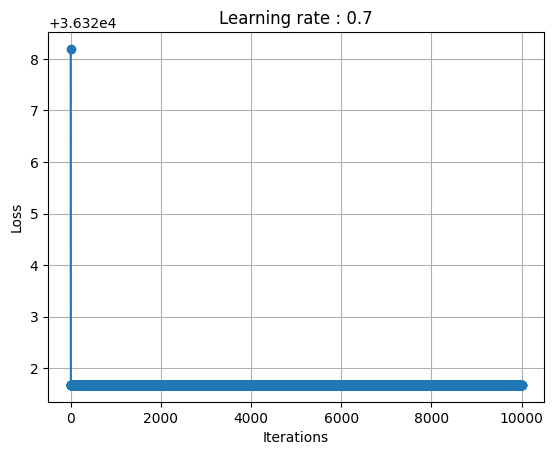

Iteration 0, Loss: 36327.45902667526
Iteration 100, Loss: 36321.677818110766
Iteration 200, Loss: 36321.677818110766
Iteration 300, Loss: 36321.677818110766
Iteration 400, Loss: 36321.677818110766
Iteration 500, Loss: 36321.677818110766
Iteration 600, Loss: 36321.677818110766
Iteration 700, Loss: 36321.677818110766
Iteration 800, Loss: 36321.677818110766
Iteration 900, Loss: 36321.677818110766
Iteration 1000, Loss: 36321.677818110766
Iteration 1100, Loss: 36321.677818110766
Iteration 1200, Loss: 36321.677818110766
Iteration 1300, Loss: 36321.677818110766
Iteration 1400, Loss: 36321.677818110766
Iteration 1500, Loss: 36321.677818110766
Iteration 1600, Loss: 36321.677818110766
Iteration 1700, Loss: 36321.677818110766
Iteration 1800, Loss: 36321.677818110766
Iteration 1900, Loss: 36321.677818110766
Iteration 2000, Loss: 36321.677818110766
Iteration 2100, Loss: 36321.677818110766
Iteration 2200, Loss: 36321.677818110766
Iteration 2300, Loss: 36321.677818110766
Iteration 2400, Loss: 36321.6

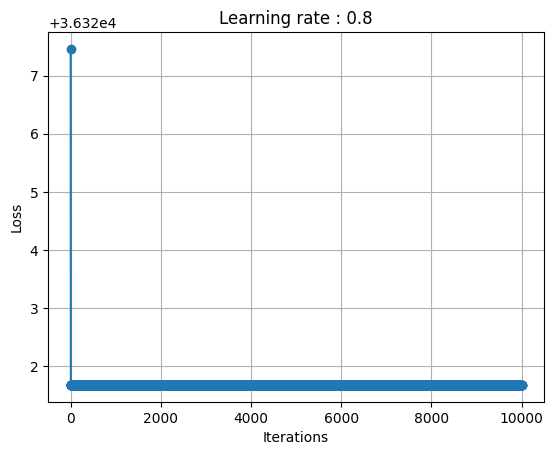

Iteration 0, Loss: 36327.4142251178
Iteration 100, Loss: 36321.677818110766
Iteration 200, Loss: 36321.677818110766
Iteration 300, Loss: 36321.677818110766
Iteration 400, Loss: 36321.677818110766
Iteration 500, Loss: 36321.677818110766
Iteration 600, Loss: 36321.677818110766
Iteration 700, Loss: 36321.677818110766
Iteration 800, Loss: 36321.677818110766
Iteration 900, Loss: 36321.677818110766
Iteration 1000, Loss: 36321.677818110766
Iteration 1100, Loss: 36321.677818110766
Iteration 1200, Loss: 36321.677818110766
Iteration 1300, Loss: 36321.677818110766
Iteration 1400, Loss: 36321.677818110766
Iteration 1500, Loss: 36321.677818110766
Iteration 1600, Loss: 36321.677818110766
Iteration 1700, Loss: 36321.677818110766
Iteration 1800, Loss: 36321.677818110766
Iteration 1900, Loss: 36321.677818110766
Iteration 2000, Loss: 36321.677818110766
Iteration 2100, Loss: 36321.677818110766
Iteration 2200, Loss: 36321.677818110766
Iteration 2300, Loss: 36321.677818110766
Iteration 2400, Loss: 36321.67

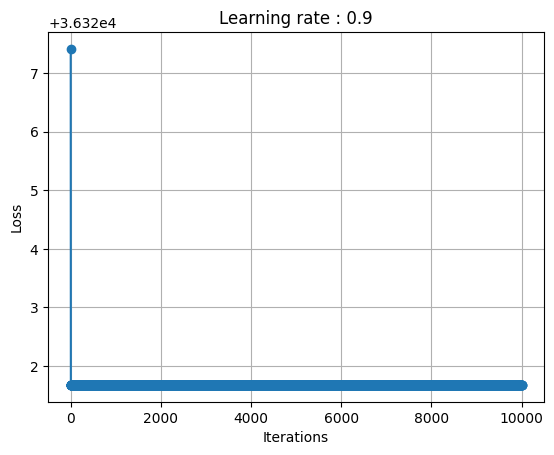

Iteration 0, Loss: 36326.057326854985
Iteration 100, Loss: 36321.677818110766
Iteration 200, Loss: 36321.677818110766
Iteration 300, Loss: 36321.677818110766
Iteration 400, Loss: 36321.677818110766
Iteration 500, Loss: 36321.677818110766
Iteration 600, Loss: 36321.677818110766
Iteration 700, Loss: 36321.677818110766
Iteration 800, Loss: 36321.677818110766
Iteration 900, Loss: 36321.677818110766
Iteration 1000, Loss: 36321.677818110766
Iteration 1100, Loss: 36321.677818110766
Iteration 1200, Loss: 36321.677818110766
Iteration 1300, Loss: 36321.677818110766
Iteration 1400, Loss: 36321.677818110766
Iteration 1500, Loss: 36321.677818110766
Iteration 1600, Loss: 36321.677818110766
Iteration 1700, Loss: 36321.677818110766
Iteration 1800, Loss: 36321.677818110766
Iteration 1900, Loss: 36321.677818110766
Iteration 2000, Loss: 36321.677818110766
Iteration 2100, Loss: 36321.677818110766
Iteration 2200, Loss: 36321.677818110766
Iteration 2300, Loss: 36321.677818110766
Iteration 2400, Loss: 36321.

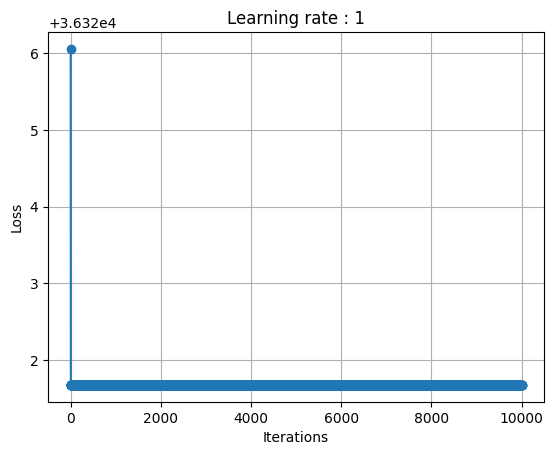

Iteration 0, Loss: 36328.01991426527
Iteration 100, Loss: 36321.677818110766
Iteration 200, Loss: 36321.677818110766
Iteration 300, Loss: 36321.677818110766
Iteration 400, Loss: 36321.677818110766
Iteration 500, Loss: 36321.677818110766
Iteration 600, Loss: 36321.677818110766
Iteration 700, Loss: 36321.677818110766
Iteration 800, Loss: 36321.677818110766
Iteration 900, Loss: 36321.677818110766
Iteration 1000, Loss: 36321.677818110766
Iteration 1100, Loss: 36321.677818110766
Iteration 1200, Loss: 36321.677818110766
Iteration 1300, Loss: 36321.677818110766
Iteration 1400, Loss: 36321.677818110766
Iteration 1500, Loss: 36321.677818110766
Iteration 1600, Loss: 36321.677818110766
Iteration 1700, Loss: 36321.677818110766
Iteration 1800, Loss: 36321.677818110766
Iteration 1900, Loss: 36321.677818110766
Iteration 2000, Loss: 36321.677818110766
Iteration 2100, Loss: 36321.677818110766
Iteration 2200, Loss: 36321.677818110766
Iteration 2300, Loss: 36321.677818110766
Iteration 2400, Loss: 36321.6

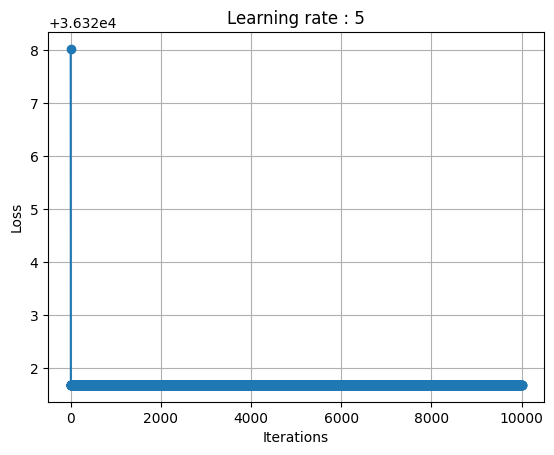

Iteration 0, Loss: 36326.063333852835
Iteration 100, Loss: 36321.677818110766
Iteration 200, Loss: 36321.677818110766
Iteration 300, Loss: 36321.677818110766
Iteration 400, Loss: 36321.677818110766
Iteration 500, Loss: 36321.677818110766
Iteration 600, Loss: 36321.677818110766
Iteration 700, Loss: 36321.677818110766
Iteration 800, Loss: 36321.677818110766
Iteration 900, Loss: 36321.677818110766
Iteration 1000, Loss: 36321.677818110766
Iteration 1100, Loss: 36321.677818110766
Iteration 1200, Loss: 36321.677818110766
Iteration 1300, Loss: 36321.677818110766
Iteration 1400, Loss: 36321.677818110766
Iteration 1500, Loss: 36321.677818110766
Iteration 1600, Loss: 36321.677818110766
Iteration 1700, Loss: 36321.677818110766
Iteration 1800, Loss: 36321.677818110766
Iteration 1900, Loss: 36321.677818110766
Iteration 2000, Loss: 36321.677818110766
Iteration 2100, Loss: 36321.677818110766
Iteration 2200, Loss: 36321.677818110766
Iteration 2300, Loss: 36321.677818110766
Iteration 2400, Loss: 36321.

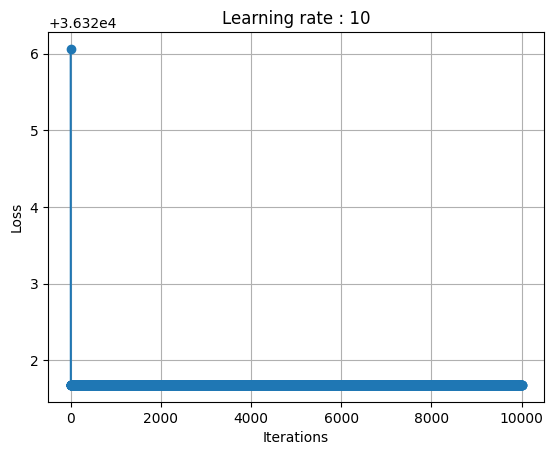

In [5]:


def train(X, Y, num_iterations, learning_rate):
    losses = []
    W1, b1, W2, b2 = init()
    for i in range(num_iterations):
        Z1, A1, Z2, A2 = forward_pp(W1, b1, W2, b2, X)
        predictions = get_predictions(A2)
        # print('test dataset accuracy : ',get_accuracy(predictions, y_test))
        loss = MSE(A2, Y)
        losses.append(loss)
        dW1, db1, dW2, db2 = backward_pp(Z1, A1, A2, W2, X, Y)
        gradients = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}
        parameters = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        parameters = gradient_descent(parameters, gradients, learning_rate)
        W1, b1, W2, b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']
        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {loss}")
        
    return W1, b1, W2, b2, losses

num_iterations = 10000
lrs=[1e-6,1e-5,1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,5,10]
for lr in lrs :
    W1,b1,W2,b2, losses = train(norm_x_train, y_train, num_iterations, lr)
    print(losses)
    print('learning rate : ', lr)
    
    print('---------------------------------------------------------------------------------------------------')
    plt.plot(losses, marker='o', linestyle='-')
    plt.title('Learning rate : ' + str(lr))
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()



# Mahla Entezari  401222017
# Report on Neural Network Implementation

## Overview
The provided code implements a basic feedforward neural network with one hidden layer using Python and NumPy. The network architecture consists of an input layer, one hidden layer, and an output layer. The activation functions are sigmoid for the hidden layer and softmax for the output layer. Functions for forward and backward propagation, parameter initialization, activation functions, loss calculation, and gradient descent optimization.

## Functionality

1. **Parameter Initialization (init())**:
   - Initializes the weights (W1, W2) and biases (b1, b2) randomly.

2. **Activation Functions**:
   - **ReLU (ReLU(x))**: Computes the Rectified Linear Unit activation function.
   - **ReLU Derivative (ReLU_deriv(x))**: Computes the derivative of the ReLU function.
   - **Softmax (softmax(x))**: Computes the softmax activation function.
   - **Softmax Derivative (softmax_derivative(x))**: Computes the derivative of the softmax function.
   - **Sigmoid (sigmoid(x))**: Computes the sigmoid activation function.
   - **Sigmoid Derivative (sigmoid_deriv(x))**: Computes the derivative of the sigmoid function.

3. **Forward Propagation (forward_pp())**:
   - Performs forward propagation through the network given input features and parameters.

4. **Backward Propagation (backward_pp())**:
   - Computes the gradients of the parameters with respect to the loss function using backpropagation.

5. **One-Hot Encoding (one_hot_encoding(x))**:
   - Converts class labels into one-hot encoded vectors.

6. **Update Parameters (update())**:
   - Updates the parameters (weights and biases) using gradient descent.

7. **Prediction Functions**:
   - **Get Predictions (get_predictions(x))**: Returns the predicted class labels.
   - **Get Accuracy (get_accuracy(predictions, x))**: Computes the accuracy of the predictions.

8. **Loss Function (MSE(Y_pred, Y_true))**:
   - Computes the Mean Squared Error (MSE) loss between predicted and true values.

9. **Gradient Descent Optimization (gradient_descent(parameters, gradients, learning_rate))**:
   - Updates the parameters using gradient descent optimization.

## conclusion :
By changing the learning rate, the loss and the speed of its changes also changed, and this was almost the best state I could achieve, which is not correct because the first graph is good, and after a few steps, an incorrect graph is created. The amount of loss decreases every step, but it is very large at the beginning and it decreases with a small speed.



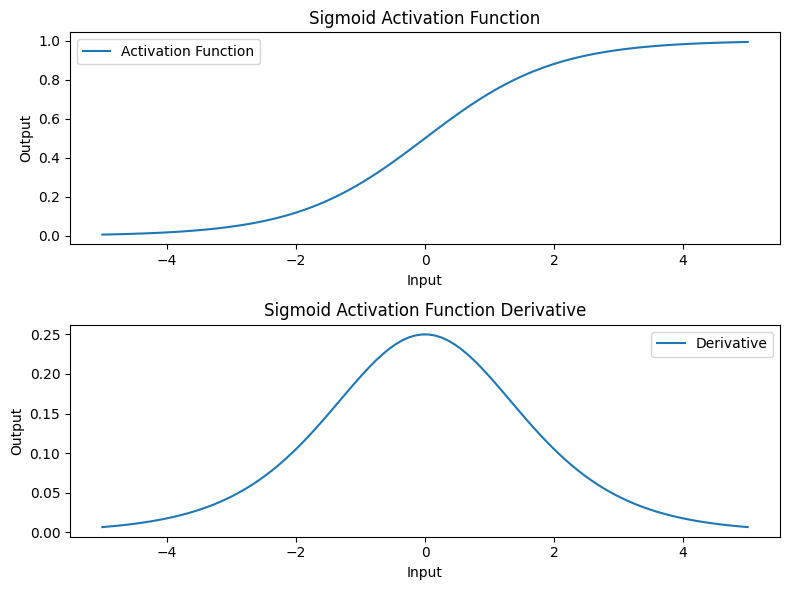

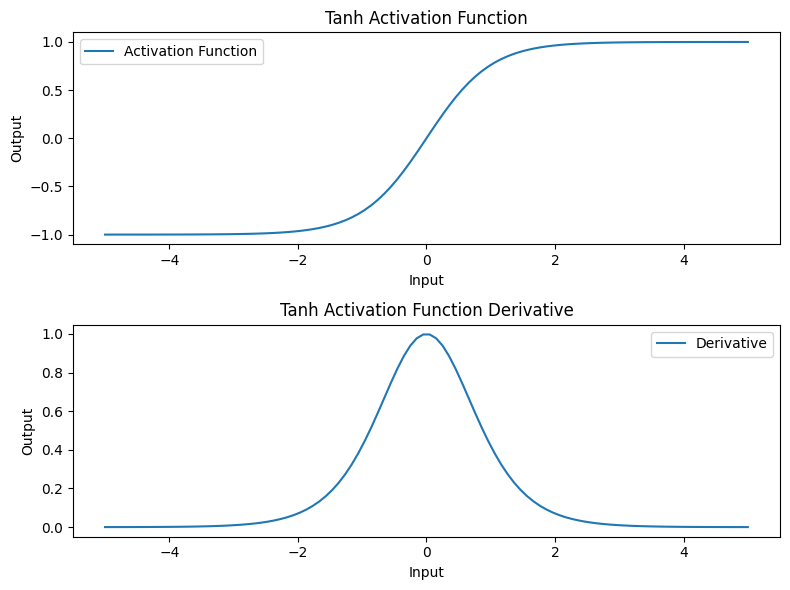

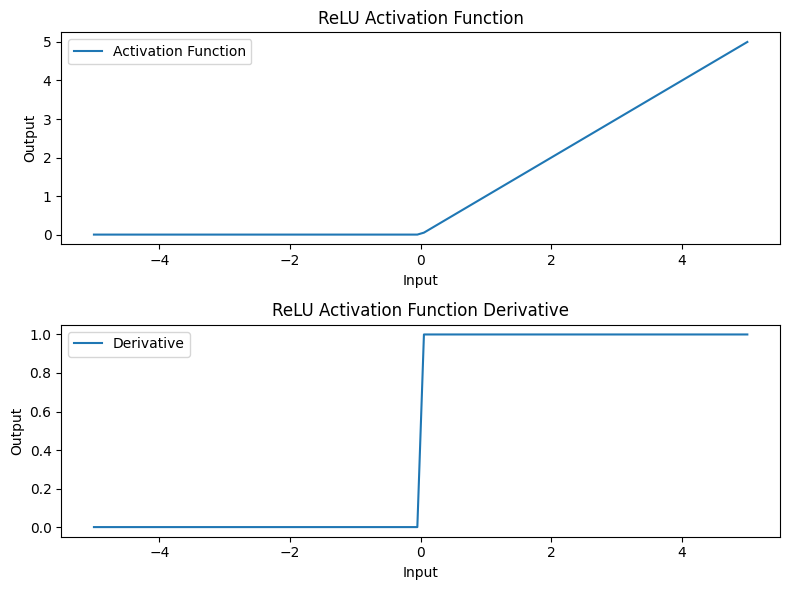

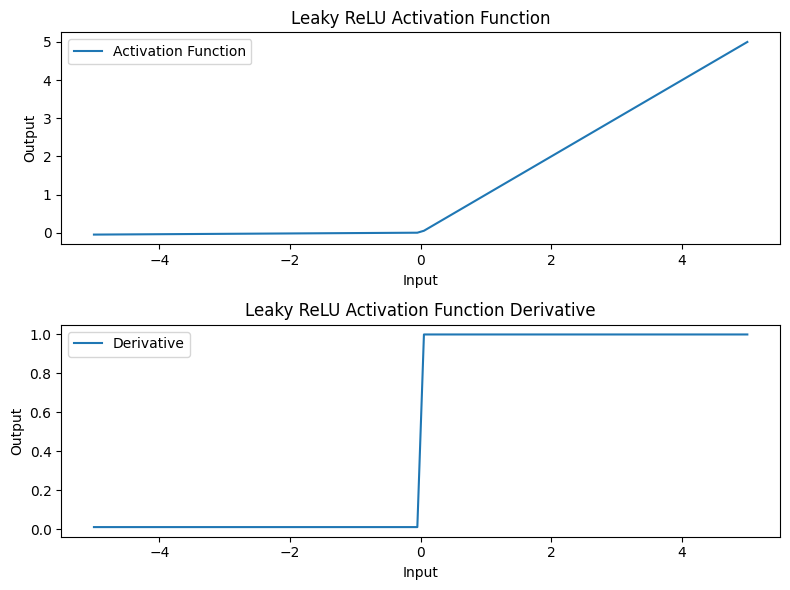

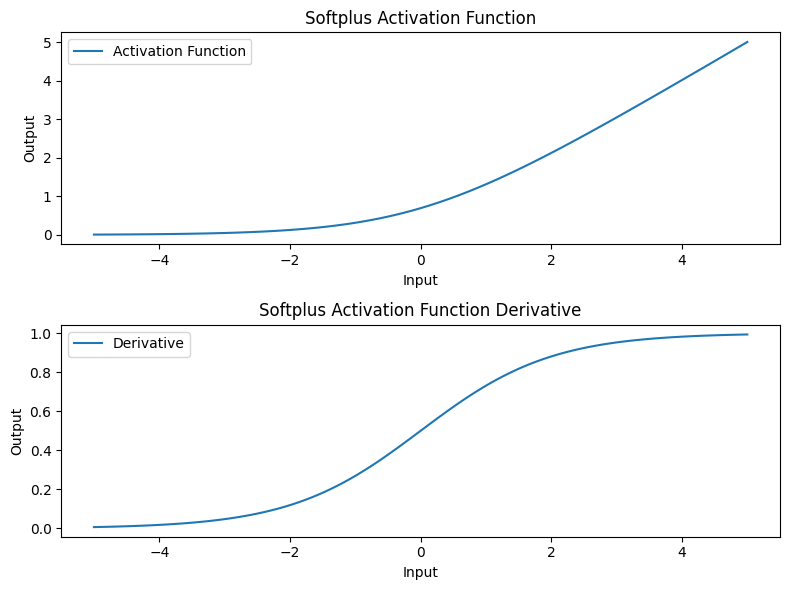

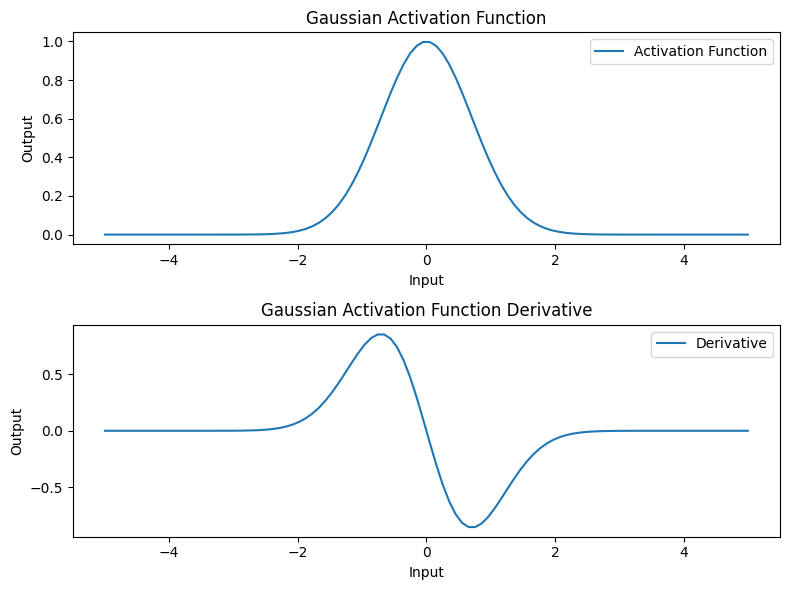

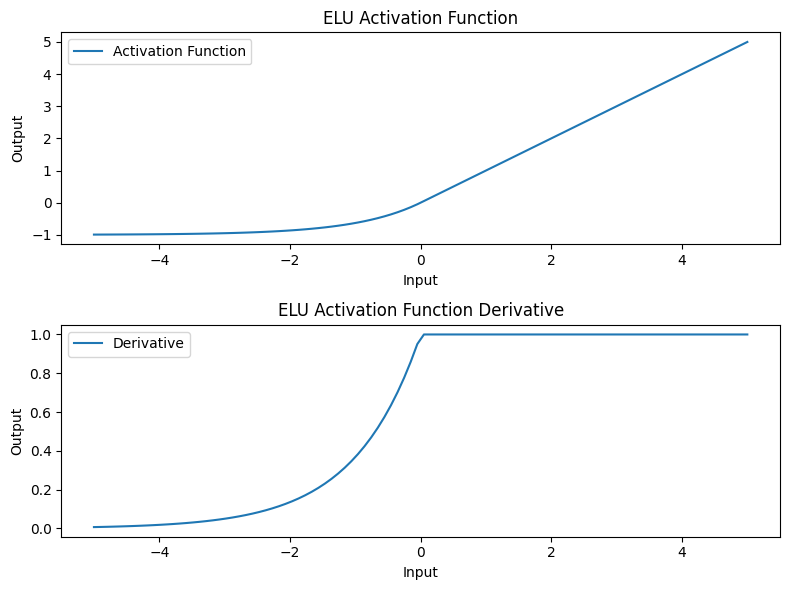

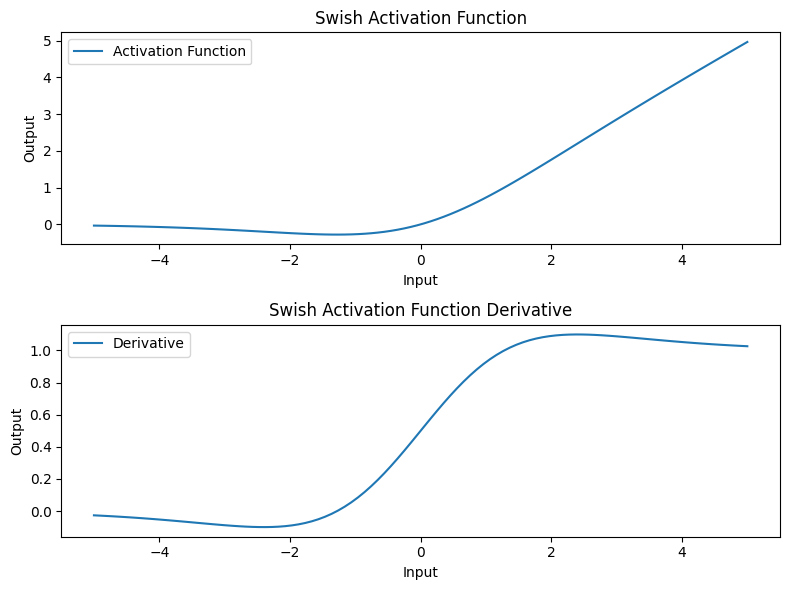

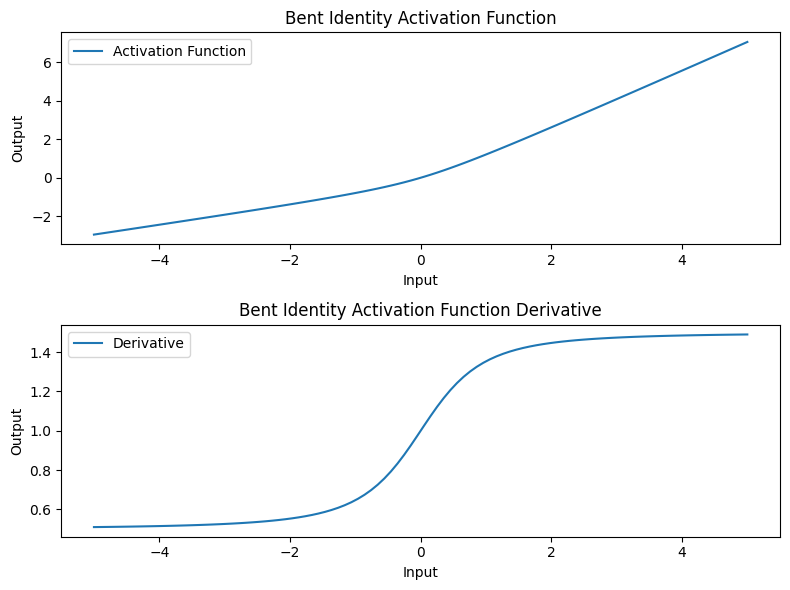

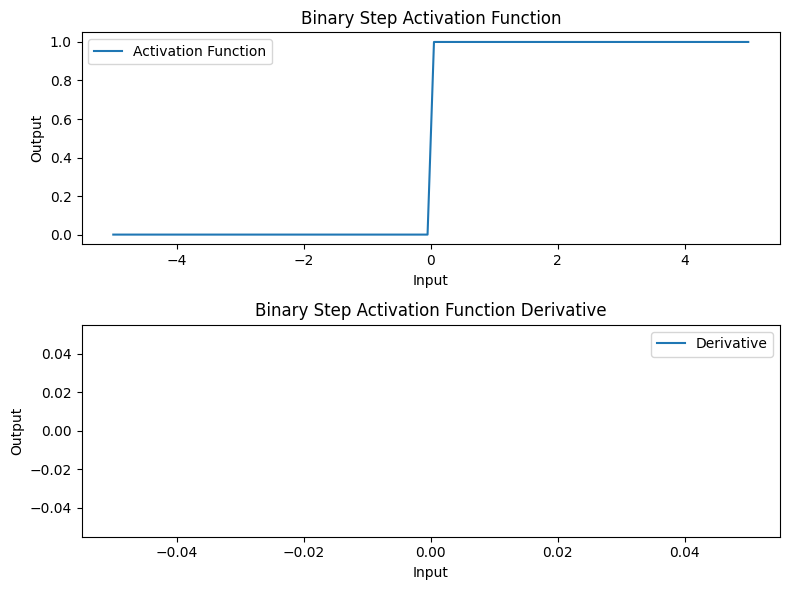

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x <= 0, 0, 1)

def leaky_relu(x, alpha=0.01):
    return np.where(x >= 0, x, alpha*x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x >= 0, 1, alpha)

def elu(x, alpha=1.0):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

def elu_derivative(x, alpha=1.0):
    return np.where(x >= 0, 1, elu(x, alpha) + alpha)

def gaussian(x):
    return np.exp(-x**2)

def gaussian_derivative(x):
    return -2 * x * np.exp(-x**2)

def softplus(x):
    return np.log(1 + np.exp(x))

def softplus_derivative(x):
    return sigmoid(x)

def swish(x):
    return x / (1 + np.exp(-x))

def swish_derivative(x):
    return swish(x) + sigmoid(x) * (1 - swish(x))

def bent_identity(x):
    return (np.sqrt(x**2 + 1) - 1) / 2 + x

def bent_identity_derivative(x):
    return x / (2 * np.sqrt(x**2 + 1)) + 1

def binary_step(x):
    return np.where(x < 0, 0, 1)

def binary_step_derivative(x):
    return np.full_like(x, np.nan)



x = np.linspace(-5, 5, 100)

activation_functions = [sigmoid, tanh, relu, leaky_relu, softplus, gaussian, elu, swish, bent_identity, binary_step]
deriv_functions = [sigmoid_derivative, tanh_derivative, relu_derivative, leaky_relu_derivative,softplus_derivative, gaussian_derivative, elu_derivative, swish_derivative, bent_identity_derivative, binary_step_derivative]
names = ['Sigmoid', 'Tanh', 'ReLU', 'Leaky ReLU', 'Softplus', 'Gaussian','ELU',  'Swish', 'Bent Identity', 'Binary Step']

for i in range(10):
    plt.figure(figsize=(8, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(x, activation_functions[i](x), label='Activation Function')
    plt.title(f'{names[i]} Activation Function')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(x, deriv_functions[i](x), label='Derivative')
    plt.title(f'{names[i]} Activation Function Derivative')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Theoretical Exercises

### 1:
- **Why logistic regression is generally preferred over a classical perceptron?**

    - **Probabilistic Interpretation:** It models the probability that a given input belongs to a certain class or not.
    - **Output Range:** The output of a Perceptron is unbounded, but Logistic Regression outputs probabilities that are constrained between 0 and 1.
    - **Smoothness:** The sigmoid function used in Logistic Regression provides a smooth transition between the two classes.
    - **Gradient Descent:** Logistic Regression can be trained using gradient descent or its variants, while Perceptron updates the weights based on misclassified examples and may not converge for linearly inseparable data.

- **To make a Perceptron equivalent to a Logistic Regression classifier:**

    - **Activation Function:** Use hyperbolic tangent or sigmoid to ensure that the output of the Perceptron is bounded between 0 and 1.
    - **Learning Rule:** Use a learning rule that minimizes a loss function, such as the cross-entropy loss commonly used in Logistic Regression.

### 2:
- **Cross-Entropy loss** is used in classification problems. It measures the dissimilarity between the predicted probability distribution and the actual probability distribution.
- **MSE** is commonly used in regression problems but can also be used in certain classification tasks. It measures the average of the squares of the errors or deviations, indicating the discrepancy between the predicted and actual class labels.
    - Cross-Entropy loss is specifically designed for classification problems, while MSE is more commonly used for regression tasks.
    - Cross-Entropy loss is preferred for classification tasks because it directly optimizes the probability distribution to output high confidence probabilities for the correct class and low probabilities for incorrect classes.

### 3:
The initial values of weights can significantly impact the convergence speed and final performance of the model.

- **Random Initialization:** Weights are randomly initialized from a uniform or Gaussian distribution. It is suitable for shallow networks or when other initialization methods are not applicable.
- **Xavier Initialization:** Initial weights are from a distribution with zero mean and a variance that depends on the number of input and output units. It scales the weights by a factor inversely proportional to the square root of the number of input units. It is suitable for maintaining the variance of activations and gradients throughout the network, promoting stable training.
- **He Initialization:** It scales the weights by a factor inversely proportional to the square root of the number of input units, similar to Xavier initialization but multiplied by a factor of 2. It is suitable for deeper networks where ReLU activations are commonly used.

If the weights in a model are symmetric, all neurons in a given layer will have identical inputs and will learn the same features.


### 4:

**ReLU**

**Benefits:** 
- ReLU activation outputs 0 for negative inputs and passes positive inputs unchanged, helping to alleviate the vanishing gradient problem and speeding up training.
- ReLU's derivative is 1 for positive inputs and 0 for negative inputs. This characteristic prevents the vanishing gradient problem, which occurs when gradients become very small, hindering the learning process, especially in deep networks.

**Drawbacks:** 
- Neurons that receive consistently negative inputs may become "dead" as they always output zero. Dead neurons do not contribute to the learning process and may slow down training or degrade model performance.

ReLU activation is preferred in most cases due to its sparsity, reduced vanishing gradient problem, and computational efficiency. However, sigmoid activation may still be useful in specific scenarios, such as binary classification tasks where the output needs to be interpretable as probabilities.

### 5:

**Idea of limiting the number of connections between neurons in different layers of the network**, dense connectivity, where each neuron in one layer is connected to every neuron in the subsequent layer.

**Sparse connectivity** can help prevent overfitting by reducing the complexity of the network. Fewer connections mean fewer parameters, which makes the model less prone to memorizing noise in the training data. By imposing sparsity, the model is encouraged to learn more robust features, leading to better generalization performance on unseen data. Sparse connectivity also reduces computational requirements during both training and inference phases since fewer connections need to be evaluated and updated. Additionally, sparse networks are easier to interpret and understand due to the clear structure of connections, making it easier to analyze and debug.

**Optimal Brain Damage** iteratively removes connections based on the second-order derivatives of the loss function with respect to the parameters and reduces the size of the model by selectively pruning connections, leading to a smaller and more efficient network.

**Sensitivity-based pruning** ranks connections based on their sensitivity to changes in the output and removes connections with the smallest sensitivity values, assuming that they contribute less to the overall model performance.

**Magnitude-Based Pruning** ranks connections based on their weight magnitudes and removes connections with the smallest weights, assuming that they have less impact on the model's output.


In [7]:
W1 = 0.15 
W2 = 0.20 
W3 = 0.25 
W4 = 0.30 
W5 = 0.40 
W6 = 0.45 
W7 = 0.50 
W8 = 0.55 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

net_h1 = 0.5 * 0.15 + 0.6 * 0.25  # 0.245
net_h2 = 0.5 * 0.20 + 0.6 * 0.30  # 0.28
h1 = sigmoid(net_h1)  # 0.5599
h2 = sigmoid(net_h2)  # 0.5708

net_o1 = h1 * 0.40 + h2 * 0.50  # 0.5649
net_o2 = h1 * 0.45 + h2 * 0.55  # 0.6279
o1 = sigmoid(net_o1)  # 0.6384
o2 = sigmoid(net_o2)  # 0.6521

# a:
error1 = 0.5 * (0.7 - o1) ** 2  # 0.0130
error2 = 0.5 * (0.8 - o2) ** 2  # 0.0593
total_error = error1 + error2  # 0.0723

# b:
delta_o1 = (o1 - 0.7) * o1 * (1 - o1)  # -0.1165
delta_o2 = (o2 - 0.8) * o2 * (1 - o2)  # -0.1277

delta_h1 = (delta_o1 * 0.40 + delta_o2 * 0.45) * h1 * (1 - h1)  # -0.0463
delta_h2 = (delta_o1 * 0.50 + delta_o2 * 0.55) * h2 * (1 - h2)  # -0.0653

W5 -= 0.3 * delta_o1 * h1  # W5 = 0.3956
W6 -= 0.3 * delta_o2 * h1  # W6 = 0.4462
W7 -= 0.3 * delta_o1 * h2  # W7 = 0.4965
W8 -= 0.3 * delta_o2 * h2  # W8 = 0.5463
W1 -= 0.3 * delta_h1 * 0.5  # W1 = 0.1522
W2 -= 0.3 * delta_h2 * 0.5  # W2 = 0.1980
W3 -= 0.3 * delta_h1 * 0.6  # W3 = 0.2462
W4 -= 0.3 * delta_h2 * 0.6  # W4 = 0.2984

# W1 = 0.1522
# W2 = 0.1980
# W3 = 0.2462
# W4 = 0.2984
# W5 = 0.3956
# W6 = 0.4462
# W7 = 0.4965
# W8 = 0.5463